# selenium 

* 셀레니움 공식문서 <br>
    https://www.selenium.dev/documentation/
* selenium은 크롤링보다 웹을 제어하는 목적이 더 큼
* 웹 브라우저마다 클라이언트 프로그램 웹 드라이버 별도로 필요. 웹 브라우저와 프로그램간 소통.

* beautifulSoup 모듈과 비슷하게 html 문서의 구조에 따라 접근할 수 있음
* selenium 은 브라우저를 직접 제어하기 때문에 마치 사람이 직접 컨트롤하듯이 마우스 클릭, 키보드입력, 자바스크립트 등 이벤트 처리를 할 수 있다.

# 셀프주유소는 정말 저렴할까?
## 4-1 Selenium 사용하기
* https://www.opinet.co.kr/searRgSelect.do
    - 지역을 변경해도 URL이 변경되지 않는다. (서초구, 양서구,...)

* beautifulSoup 모듈은 로그인이 필요하거나 어떠한 버튼을 클릭하거나 나오는 페이지의 정보들을 가져오기 힘들다. 
    => Selenium 사용

* Selenium 사용
    - 1) pip install selenium
    - 2) 크롬 드라이버 다운로드 ( 구글에 검색하고 버전에 맞는 드라이버 다운로드)
        * 크롬 > ... > 도움말 > Chrome 정보 > 버전확인
        https://chromedriver.chromium.org/downloads

In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [3]:
service = Service(path = '../driver/chromedriver.exe')    # 다운받은 chrmoedriver의 위치
driver = webdriver.Chrome(service = service)    #열려진 창을 유지해야 드라이버가 실행됨

In [4]:
driver.get("http://naver.com")   #열려진 창 유지해야 아래 스크린샷 동작됨

In [5]:
driver.save_screenshot('../images/naver.png')       #현재 열려있는 네이버페이지의 스크린샷을 해당경로에 저장한다. 

True

In [6]:
driver.close() # 다 끝나면 드라이버 종료

## 4-2 서울시 구별주유소 가격 정보 얻기
* 오피넷( https://www.opinet.co.kr/ ) (한국석유공사)
* 셀레니움 버전이 바뀌면 프로그램이 실행되지 않을 수 있다. 당황하지 말고 공식문서 참고하기
* 참고사이트
    * Selenium : https://www.selenium.dev/documentation/ (공식문서)
    * https://fenderist.tistory.com/168
    * https://pythoninoffice.com/fixing-attributeerror-webdriver-object-has-no-attribute-find_element_by_xpath/ (변경사항)

In [7]:
from selenium import webdriver

In [8]:
service = Service(path = '../driver/chromedriver.exe')    
driver = webdriver.Chrome(service = service)    # 제어당하고 있는 창 그대로 둬야함. 

In [9]:
driver.get('https://www.opinet.co.kr/searRgSelect.do')    # 오피넷 메인화면 > 싼 주유소찾기 > 지역별

* 데이터를 변경하면 지도에 변경된 내용이 나오나 URL이 변화하지 않음

In [19]:
from selenium.webdriver.common.by import By
sido_list_raw = driver.find_element(By.ID, "SIDO_NM0")   # 왼쪽 상단의 지역 카테고리에서 시/도 결정하는 select 태그의 id 
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="581930188242e0daadd09b60b0b10ecf", element="7F272C765F7F158C4A71D40DEDDB9E18_element_4")>

In [20]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')   # sido_list_raw 에서 가져온 select 태그의 하위태그인 option의id
sido_list[1].get_attribute('value')    #option의 value값 찍어보기

'서울특별시'

In [22]:
# 시, 도 정보
sido_names = [option.get_attribute('value') for option in sido_list]    # sido_list하위 option 태그의 value값을 반복문을 써 가져옴 
sido_names = sido_names[1:]     # 0번째 데이터는 '시/도' 표기이므로 제외
sido_names[:5], len(sido_names)

(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시'], 17)

In [23]:
# 시,군,구 정보.
gu_list_raw = driver.find_element(By.ID, 'SIGUNGU_NM0')   #왼쪽 상단의 지역카테고리에서 두번째 선택란. select 태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option')

In [24]:
gu_names = [option.get_attribute('value') for option in gu_list]   # gu_list하위 option 태그의 value값을 반복문을 써 가져옴
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [25]:
import time
from tqdm import tqdm_notebook

In [29]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)    #시간을 충분히줘서 긁어올 수 있도록 한다. 못긁어오면 숫자를 늘리면 됨
    
    driver.find_element(By.ID, 'glopopd_excel').click()   # 왼족 하단의 '엑셀저장' 버튼의 id
    time.sleep(4)   # 4초간 프로세스를 중지한다. 라는 의미

  0%|          | 0/25 [00:00<?, ?it/s]

In [31]:
driver.close()

## 4-5. 구별 주유 가격에 대한 데이터의 정리

In [32]:
import pandas as pd
from glob import glob

In [33]:
glob('../data/python_data/지역_위치*.xls')

['../data/python_data\\지역_위치별(주유소) (1).xls',
 '../data/python_data\\지역_위치별(주유소) (10).xls',
 '../data/python_data\\지역_위치별(주유소) (11).xls',
 '../data/python_data\\지역_위치별(주유소) (12).xls',
 '../data/python_data\\지역_위치별(주유소) (13).xls',
 '../data/python_data\\지역_위치별(주유소) (14).xls',
 '../data/python_data\\지역_위치별(주유소) (15).xls',
 '../data/python_data\\지역_위치별(주유소) (16).xls',
 '../data/python_data\\지역_위치별(주유소) (17).xls',
 '../data/python_data\\지역_위치별(주유소) (18).xls',
 '../data/python_data\\지역_위치별(주유소) (19).xls',
 '../data/python_data\\지역_위치별(주유소) (2).xls',
 '../data/python_data\\지역_위치별(주유소) (20).xls',
 '../data/python_data\\지역_위치별(주유소) (21).xls',
 '../data/python_data\\지역_위치별(주유소) (22).xls',
 '../data/python_data\\지역_위치별(주유소) (23).xls',
 '../data/python_data\\지역_위치별(주유소) (24).xls',
 '../data/python_data\\지역_위치별(주유소) (3).xls',
 '../data/python_data\\지역_위치별(주유소) (4).xls',
 '../data/python_data\\지역_위치별(주유소) (5).xls',
 '../data/python_data\\지역_위치별(주유소) (6).xls',
 '../data/python_data\\지역_위치별(주유소) (7).x

In [34]:
stations_files = glob('../data/python_data/지역_위치별*.xls')
stations_files

['../data/python_data\\지역_위치별(주유소) (1).xls',
 '../data/python_data\\지역_위치별(주유소) (10).xls',
 '../data/python_data\\지역_위치별(주유소) (11).xls',
 '../data/python_data\\지역_위치별(주유소) (12).xls',
 '../data/python_data\\지역_위치별(주유소) (13).xls',
 '../data/python_data\\지역_위치별(주유소) (14).xls',
 '../data/python_data\\지역_위치별(주유소) (15).xls',
 '../data/python_data\\지역_위치별(주유소) (16).xls',
 '../data/python_data\\지역_위치별(주유소) (17).xls',
 '../data/python_data\\지역_위치별(주유소) (18).xls',
 '../data/python_data\\지역_위치별(주유소) (19).xls',
 '../data/python_data\\지역_위치별(주유소) (2).xls',
 '../data/python_data\\지역_위치별(주유소) (20).xls',
 '../data/python_data\\지역_위치별(주유소) (21).xls',
 '../data/python_data\\지역_위치별(주유소) (22).xls',
 '../data/python_data\\지역_위치별(주유소) (23).xls',
 '../data/python_data\\지역_위치별(주유소) (24).xls',
 '../data/python_data\\지역_위치별(주유소) (3).xls',
 '../data/python_data\\지역_위치별(주유소) (4).xls',
 '../data/python_data\\지역_위치별(주유소) (5).xls',
 '../data/python_data\\지역_위치별(주유소) (6).xls',
 '../data/python_data\\지역_위치별(주유소) (7).x

In [35]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [36]:
station_raw.info()
# 휘발유, 고급휘발유 등 object 타입

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 45
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      537 non-null    object
 1   상호      537 non-null    object
 2   주소      537 non-null    object
 3   상표      537 non-null    object
 4   전화번호    537 non-null    object
 5   셀프여부    537 non-null    object
 6   고급휘발유   537 non-null    object
 7   휘발유     537 non-null    object
 8   경유      537 non-null    object
 9   실내등유    537 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


In [37]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-


In [38]:
stations = pd.DataFrame({'Oil_store': station_raw['상호'], 
                         '주소': station_raw['주소'],
                        '가격': station_raw['경유'],        # 수업에서는 휘발유로 했지만 경유로 가져옴.
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표'] })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1354,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1355,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1349,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1388,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1388,Y,GS칼텍스


In [39]:
stations['주소']

0          서울 강동구 성안로 102 (성내동)
1         서울 강동구 구천면로 357 (암사동)
2        서울 강동구 양재대로 1323 (성내동)
3         서울 강동구 올림픽로 673 (천호동)
4         서울 강동구 올림픽로 578 (성내동)
                ...            
41        서울 강남구 압구정로 426 (청담동)
42    서울특별시 강남구  봉은사로 311 (논현동)
43         서울 강남구 삼성로 521 (삼성동)
44        서울 강남구 봉은사로 503 (삼성동)
45         서울 강남구 언주로 716 (논현동)
Name: 주소, Length: 537, dtype: object

In [40]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]   #구 컬럼 추가
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1354,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1355,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1349,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1388,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1388,Y,GS칼텍스,강동구


In [41]:
# 서울특별시, 특별시가 보임. 처리필요
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '서울특별시', '성북구',
       '송파구', '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [42]:
stations[stations['구'] == '서울특별시']

,Oil_store,주소,가격,셀프,상표,구
12,SK네트웍스(주)효진주유소,1 서울특별시 성동구 동일로 129 (성수동2가),1484,N,SK에너지,서울특별시


In [47]:
stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '특별시', '강남구'],
      dtype=object)

In [53]:
stations[stations['구'] == '서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [49]:
stations[stations['구'] == '특별시']

,Oil_store,주소,가격,셀프,상표,구
10,서현주유소,서울 특별시 도봉구 방학로 142 (방학동),1318,Y,S-OIL,특별시


In [51]:
stations.loc[stations['구'] == '특별시', '구'] = '도봉구'
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [52]:
stations[stations['구'] == '특별시']

,Oil_store,주소,가격,셀프,상표,구


In [54]:
# 가격이 없는 것은 제외
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1354,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1355,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1349,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1388,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1388,Y,GS칼텍스,강동구


In [61]:
# 가격이 object로 되어있으므로 float로 바꿔준다
stations['가격'] = [float(value) for value in stations['가격']]
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  533 non-null    object 
 1   주소         533 non-null    object 
 2   가격         533 non-null    float64
 3   셀프         533 non-null    object 
 4   상표         533 non-null    object 
 5   구          533 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


In [58]:
stations.reset_index(inplace = True)
stations.head()

In [ ]:
del stations['index']
stations.head()

In [59]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  533 non-null    object 
 1   주소         533 non-null    object 
 2   가격         533 non-null    float64
 3   셀프         533 non-null    object 
 4   상표         533 non-null    object 
 5   구          533 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.1+ KB


## 4-4. 셀프주유소는 정말 저렴한지 boxplot으로 확인하기

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
path = 'C:\Windows\Fonts\malgun.ttf'

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')

<Axes: title={'center': '가격'}, xlabel='셀프'>

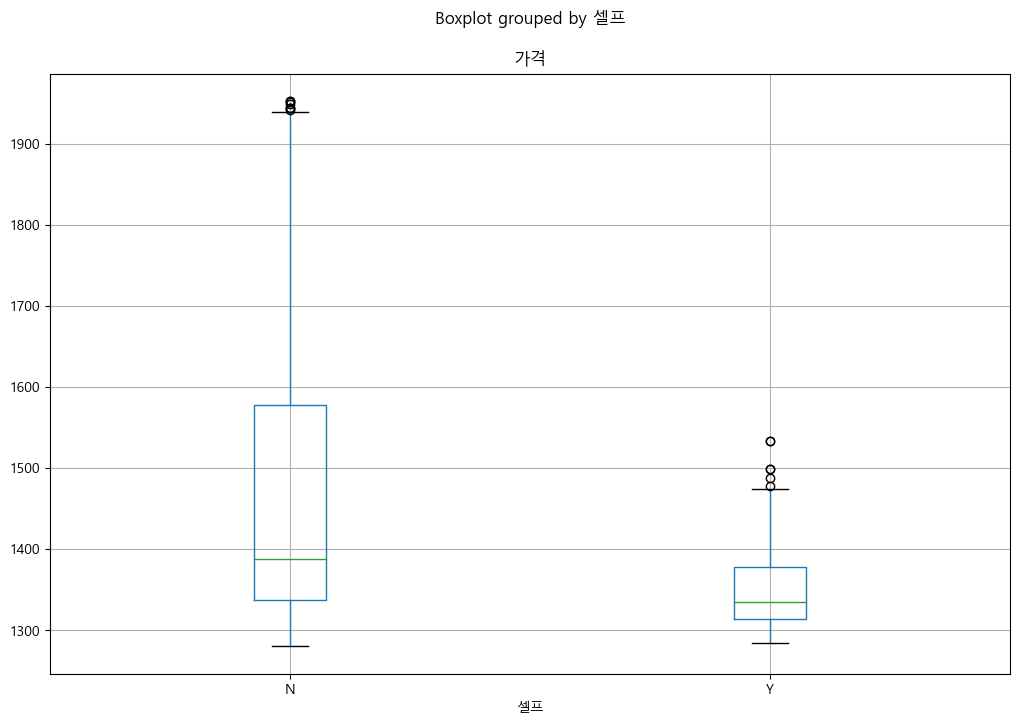

In [63]:
stations.boxplot(column = '가격', by = '셀프', figsize = (12,8))

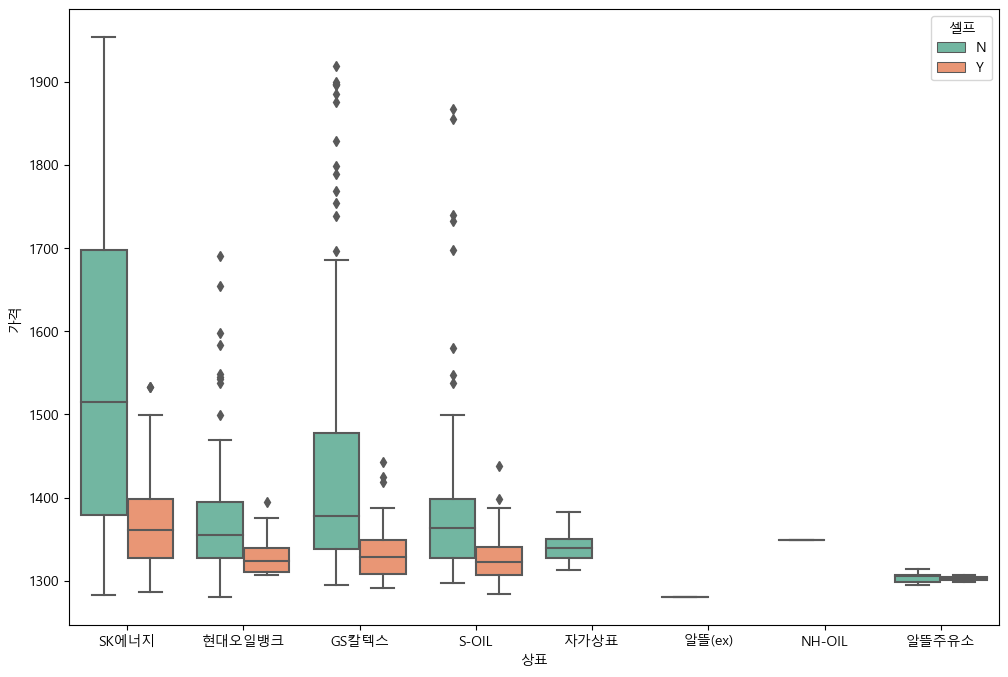

In [67]:
plt.figure(figsize = (12,8))
sns.boxplot(x='상표', y='가격', hue = '셀프', data=stations, palette = 'Set2')   #palette는 색상
plt.show()

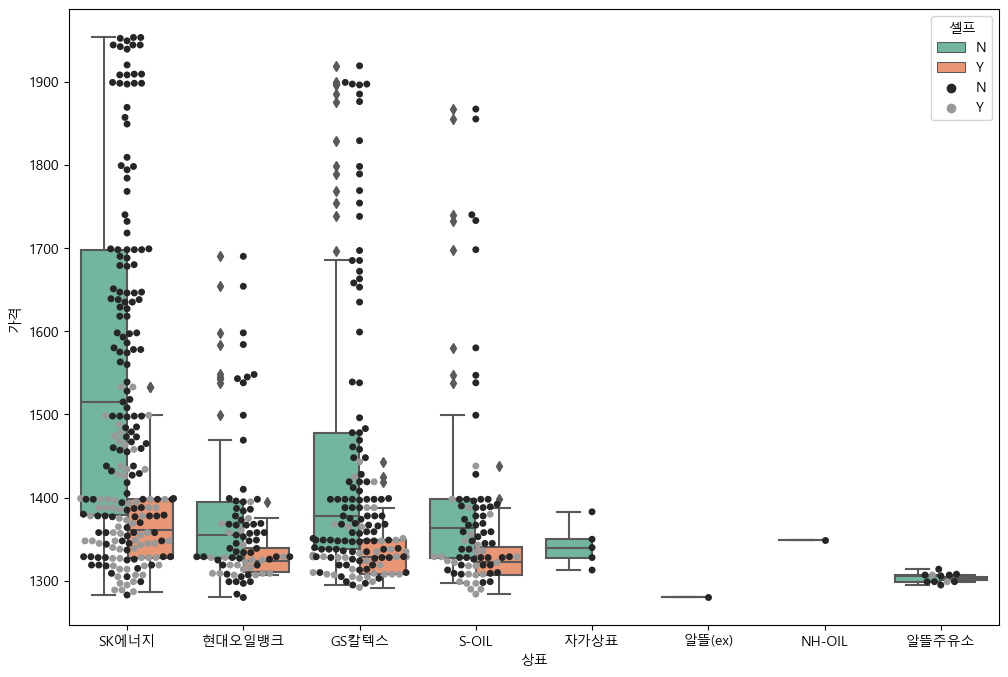

In [69]:
plt.figure(figsize = (12,8))
sns.boxplot(x='상표', y='가격', hue = '셀프', data=stations, palette = 'Set2')   #palette는 색상
sns.swarmplot( x='상표', y='가격', hue = '셀프', data=stations, color='.6' )     
# seaborn,matplotlib의 공식문서에 그래프가 종류별로 있다. 공식문서 참고하기 
plt.show()

# 4-5.서울시 구별 주유 가격 확인하기

In [71]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [73]:
stations.sort_values(by = '가격', ascending = False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,흥국주유소,서울 용산구 한남대로 204 (한남동),1953.0,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),1953.0,N,SK에너지,중구
325,서남주유소,서울 중구 통일로 30 (봉래동1가),1952.0,N,SK에너지,중구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),1949.0,N,SK에너지,용산구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),1944.0,N,SK에너지,용산구


In [75]:
stations.sort_values(by = '가격', ascending = True).head(10)   # 가격이 싼 곳 순서대로

,Oil_store,주소,가격,셀프,상표,구
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1280.0,N,알뜰(ex),서초구
470,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1280.0,N,현대오일뱅크,도봉구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1283.0,N,SK에너지,구로구
467,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1284.0,N,현대오일뱅크,도봉구
471,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1284.0,Y,S-OIL,도봉구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1287.0,Y,SK에너지,강서구
469,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1289.0,Y,SK에너지,도봉구
468,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),1289.0,Y,SK에너지,도봉구
473,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1290.0,Y,S-OIL,도봉구
472,오복주유소,서울 도봉구 방학로 43 (방학동),1290.0,Y,S-OIL,도봉구


In [77]:
import numpy as np
gu_data = pd.pivot_table(stations, index = ['구'], values = ['가격'])   # pivot_table을 이용하면 빨리 구할 수있다.
gu_data.head()

,가격
구,
강남구,1585.152174
강동구,1457.333333
강북구,1319.750000
강서구,1366.142857
관악구,1399.111111


In [78]:
geo_path = '../data/python_data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

map = folium.Map(location = [37.5502, 126.982], zoom_start = 10.5, tiles = 'Stamen Toner')

map.choropleth(geo_data = geo_str, 
              data = gu_data, 
              columns = [gu_data.index, '가격'],
              fill_color = 'PuRd',
              key_on = 'feature.id')
map

In [79]:
gu_data.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='구')

## 4-6. 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [101]:
oil_price_top10 = stations.sort_values(by = '가격', ascending = False).head(10)   #가격 상위 10개
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
282,흥국주유소,서울 용산구 한남대로 204 (한남동),1953.0,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),1953.0,N,SK에너지,중구
325,서남주유소,서울 중구 통일로 30 (봉래동1가),1952.0,N,SK에너지,중구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),1949.0,N,SK에너지,용산구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),1944.0,N,SK에너지,용산구
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),1944.0,N,SK에너지,용산구
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),1944.0,N,SK에너지,종로구
324,장충주유소,서울 중구 장충단로 202 (장충동1가),1942.0,N,SK에너지,중구
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),1939.0,N,SK에너지,서초구
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),1920.0,N,SK에너지,강남구


In [102]:
oil_price_bottom10 = stations.sort_values(by = '가격', ascending = True).head(10)  # 가격 하위 10개
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1280.0,N,알뜰(ex),서초구
470,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1280.0,N,현대오일뱅크,도봉구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1283.0,N,SK에너지,구로구
467,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1284.0,N,현대오일뱅크,도봉구
471,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1284.0,Y,S-OIL,도봉구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1287.0,Y,SK에너지,강서구
469,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1289.0,Y,SK에너지,도봉구
468,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),1289.0,Y,SK에너지,도봉구
473,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1290.0,Y,S-OIL,도봉구
472,오복주유소,서울 도봉구 방학로 43 (방학동),1290.0,Y,S-OIL,도봉구


In [103]:
gmaps_key = ' '   # 개인에게 할당된 구글 맵스 api 키를 입력. 
gmaps = googlemaps.Client(key = gmaps_key)

In [104]:
oil_price_top10.index

Int64Index([282, 323, 325, 284, 285, 283, 313, 324, 124, 532], dtype='int64')

In [105]:
from tqdm import tqdm_notebook

lat = []  #위도
lng = []  #경도

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:       #주소값이 없다면
        lat.append(np.nan)
        lng.append(np.nan)
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
282,흥국주유소,서울 용산구 한남대로 204 (한남동),1953.0,N,SK에너지,용산구,37.545969,127.002875
323,통일주유소,서울 중구 동호로 296 (장충동2가),1953.0,N,SK에너지,중구,37.560850,127.003418
325,서남주유소,서울 중구 통일로 30 (봉래동1가),1952.0,N,SK에너지,중구,37.558375,126.972094
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),1949.0,N,SK에너지,용산구,37.547038,126.972236
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),1944.0,N,SK에너지,용산구,37.540512,126.965311
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),1944.0,N,SK에너지,용산구,37.534945,126.945876
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),1944.0,N,SK에너지,종로구,37.576426,126.985843
324,장충주유소,서울 중구 장충단로 202 (장충동1가),1942.0,N,SK에너지,중구,37.562780,127.007034
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),1939.0,N,SK에너지,서초구,37.478089,127.039592
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),1920.0,N,SK에너지,강남구,37.517647,127.035735


In [106]:
oil_price_top10.index

Int64Index([282, 323, 325, 284, 285, 283, 313, 324, 124, 532], dtype='int64')

In [107]:
str(oil_price_top10['주소'][282]).split('(')[0]   # str(oil_price_top10['주소'][n]).split('(')[0] 코드 실행해봄. 282는 위의index 첫번째

'서울 용산구 한남대로 204 '

In [108]:
gmaps.geocode( str(oil_price_top10['주소'][282]).split('(')[0] )    #tmp_map = gmaps.geocode(tmp_add) 코드를 실행해봄

[{'address_components': [{'long_name': '204',
    'short_name': '204',
    'types': ['premise']},
   {'long_name': 'Hannam-daero',
    'short_name': 'Hannam-daero',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': 'Yongsan-gu',
    'short_name': 'Yongsan-gu',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': 'Seoul',
    'short_name': 'Seoul',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'South Korea',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '04417', 'short_name': '04417', 'types': ['postal_code']}],
  'formatted_address': '204 Hannam-daero, Yongsan-gu, Seoul, South Korea',
  'geometry': {'location': {'lat': 37.5459695, 'lng': 127.0028749},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.54731848029149,
     'lng': 127.0042238802915},
    'southwest': {'lat': 37.5446205197085, 'lng': 127.0015259197085}}},
  'place_id': 'ChI

In [109]:
lat = []  #위도
lng = []  #경도

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    except:       #주소값이 없다면
        lat.append(np.nan)
        lng.append(np.nan)
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1280.0,N,알뜰(ex),서초구,37.460084,127.042169
470,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1280.0,N,현대오일뱅크,도봉구,37.657861,127.040525
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1283.0,N,SK에너지,구로구,37.491052,126.826655
467,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1284.0,N,현대오일뱅크,도봉구,37.674461,127.044124
471,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1284.0,Y,S-OIL,도봉구,37.654016,127.037556
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1287.0,Y,SK에너지,강서구,37.553962,126.768428
469,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1289.0,Y,SK에너지,도봉구,37.661180,127.041630
468,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),1289.0,Y,SK에너지,도봉구,37.645055,127.032114
473,극동유화(주)대안주유소,서울 도봉구 마들로 574 (창동),1290.0,Y,S-OIL,도봉구,37.661516,127.047525
472,오복주유소,서울 도봉구 방학로 43 (방학동),1290.0,Y,S-OIL,도봉구,37.662341,127.047454


In [118]:
map = folium.Map(location = [37.5502, 126.982], zoom_start = 10.5)
import pandas as pd

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):    # 위도가 null이 아니면 아래를 실행
        folium.CircleMarker( [oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                radius = 15, color = '#cd3181', fill_color = '#cd3181', fill = True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]):
        folium.CircleMarker([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]],
                radius = 15, color = '#CD3181', fill_color = '#CD3181', fill = True).add_to(map)
    
map